<a href="https://colab.research.google.com/github/2303a51343/Aiml-2025/blob/main/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train=pd.read_csv('/content/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
d=train.describe(percentiles=[.25,.50])

Text(0, 0.5, 'count')

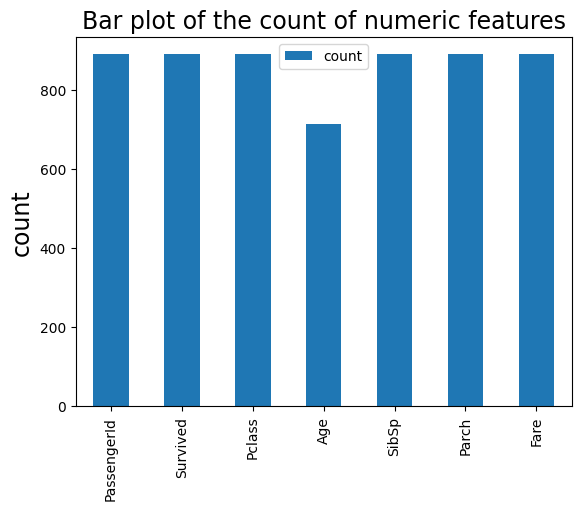

In [12]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)
plt.ylabel("count",fontsize=17)

<Axes: xlabel='Survived', ylabel='count'>

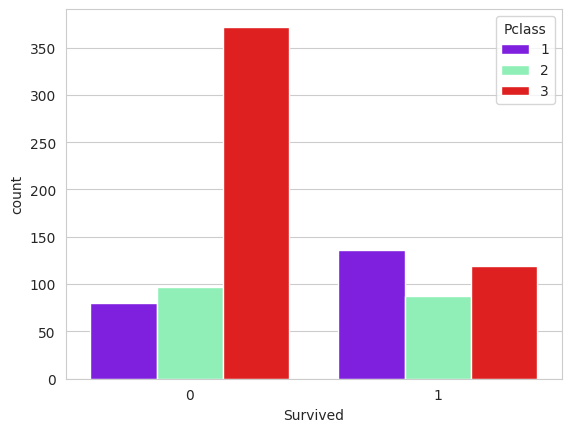

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow') # Change 'pclass' to 'Pclass'
#sns.pairplot(train)

Text(0.5, 1.0, 'Fraction of passengers survived by class')

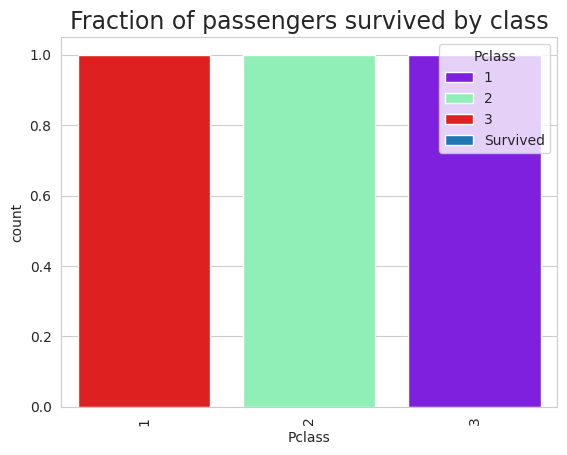

In [14]:
f_class_survived=train.groupby('Pclass')['Survived'].mean()
f_class_survived = pd.DataFrame(f_class_survived)
f_class_survived
f_class_survived.plot.bar(y='Survived')
sns.countplot(x='Survived',hue='Pclass',data=f_class_survived,palette='rainbow')
plt.title("Fraction of passengers survived by class",fontsize=17)

Text(0.5, 0, ' Passenger Class')

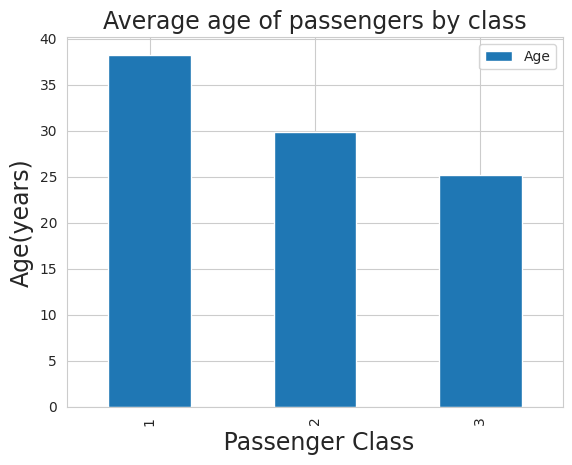

In [15]:
f_class_Age=train.groupby('Pclass')['Age'].mean()
f_class_Age = pd.DataFrame(f_class_Age)
f_class_Age
f_class_Age.plot.bar(y='Age')
plt.title("Average age of passengers by class",fontsize=17)
plt.ylabel("Age(years)",fontsize=17)
plt.xlabel(" Passenger Class",fontsize=17)

In [16]:
a=list(f_class_Age['Age'])

def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return a[0]
    elif Pclass==2:
      return a[1]
    else:
      return a[2]
  else:
    return Age

<ipython-input-16-d9dff34646e5>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
<ipython-input-16-d9dff34646e5>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


Text(0.5, 1.0, 'Bar plot of the count of numeric features')

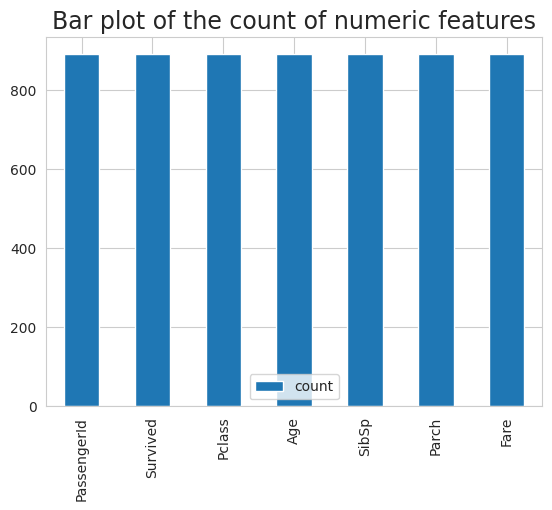

In [17]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)
d=train.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

In [18]:
train.drop(['Cabin','PassengerId','Name','Ticket'], axis=1,
           inplace=True)
train.dropna(inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [20]:
# Check if 'Sex' column exists before trying to drop it
if 'Sex' in train.columns:
  train.drop(['Sex'],axis=1,inplace=True)

train = pd.concat([train,sex,embark],axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,True,False,True
1,1,1,38.0,1,0,71.2833,C,False,False,False
2,1,3,26.0,0,0,7.9250,S,False,False,True
3,1,1,35.0,1,0,53.1000,S,False,False,True
4,0,3,35.0,0,0,8.0500,S,True,False,True


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.20,
                                                    random_state=111)

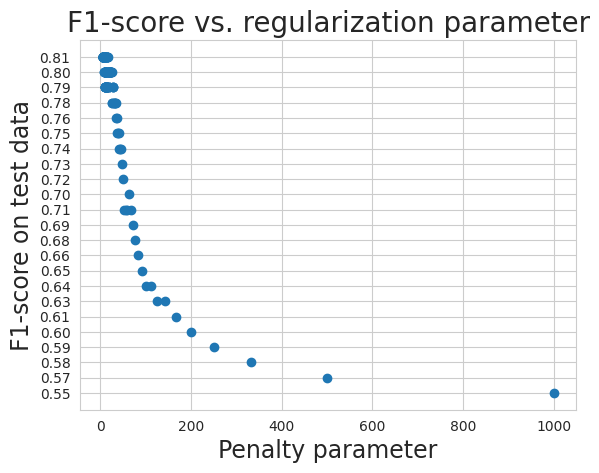

In [23]:
# Convert 'Embarked' column to numerical values using one-hot encoding
embarked_encoded = pd.get_dummies(train['Embarked'], prefix='Embarked')

# Concatenate the encoded columns with the DataFrame
train = pd.concat([train, embarked_encoded], axis=1)

# Drop the original 'Embarked' column
train.drop('Embarked', axis=1, inplace=True)

# Now continue with your model training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.20,
                                                    random_state=111)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu

for i in range(1,nsimu):
          logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=int(1e6),n_jobs=4))
          logmodel[i].fit(X_train,y_train) # Changed x_train to X_train
          predictions[i] = logmodel[i].predict(X_test) # Changed x_test to X_test
          class_report[i] = classification_report(y_test,predictions[i])
          l=class_report[i].split()
          f1[i] = l[len(l)-2]
          penalty[i]=1000/i
plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()